In [11]:
import sys
sys.path.append('../../dmrt/')
sys.path.append('../../lange/')

In [12]:
import diffTools
import numpy as np
import matplotlib.pyplot as plt
import pylange

In [23]:
difft = diffTools.DiffTools()
inp = pylange.lange(P=6,N=1,m=1,G=1, dt=0.01)
radii=np.linspace(-2,2,40)
print(radii)

[-2.         -1.8974359  -1.79487179 -1.69230769 -1.58974359 -1.48717949
 -1.38461538 -1.28205128 -1.17948718 -1.07692308 -0.97435897 -0.87179487
 -0.76923077 -0.66666667 -0.56410256 -0.46153846 -0.35897436 -0.25641026
 -0.15384615 -0.05128205  0.05128205  0.15384615  0.25641026  0.35897436
  0.46153846  0.56410256  0.66666667  0.76923077  0.87179487  0.97435897
  1.07692308  1.17948718  1.28205128  1.38461538  1.48717949  1.58974359
  1.69230769  1.79487179  1.8974359   2.        ]


In [24]:
dists,tms,cts,upts = difft.compute(inp[:,:2], mode='mfptcross',radii=radii,verb=True)
print(tms,cts,upts)

[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan    0.         ...  173.00637421
  1813.61045702           nan]
 ...
 [          nan           nan  383.49240746 ...    0.
            nan           nan]
 [          nan           nan  154.20982995 ...           nan
     0.                   nan]
 [          nan           nan           nan ...           nan
            nan           nan]] [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 20 ... 20  8  0]
 ...
 [ 0  0 26 ... 28  0  0]
 [ 0  0  2 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]] [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 20 ...  8  1  0]
 ...
 [ 0  0  7 ... 28  0  0]
 [ 0  0  1 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]]


../../dmrt/diffTools.py:39: RuntimeWarning: invalid value encountered in true_divide
  tms = tms/cts


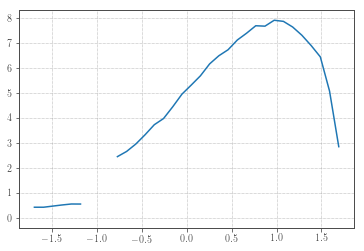

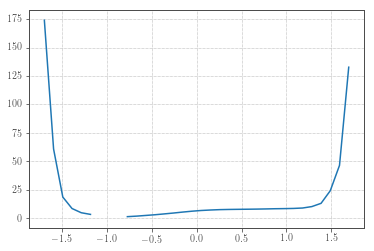

In [44]:
# Inertial Effekte erzeugen schnellere mftps an steilen reflektierenden Grenzen

# MFPTs mit variablen x_ini (und festem x_final)
plt.plot(dists[3:-3],tms.T[10,3:-3])
#plt.plot(dists[3:-3],tms.T[-10,3:-3])
plt.show()

# MFPTs mit variablen x_final (und festem x_ini)
plt.plot(dists[3:-3],tms[10,3:-3])
#plt.plot(dists[3:-3],tms[-10,3:-3])
plt.show()

In [ ]:
tms